# Anomaly Detection

### Importing the Necessary Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.anomaly import *
mpl.rcParams['figure.dpi'] = 300

### Loading the Dataset

In [2]:
numeric = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
categorical = ['Channel','Region']

replace_dict = { "Channel": {1: "Horeca", 2: "Retail"},
                 "Region":  {1: "Lisbon", 2: "Oporto", 3: "Other"} }

data = get_data('wholesale', verbose = False)
data.replace(replace_dict, inplace = True) 
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Horeca,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
5,Retail,Other,9413,8259,5126,666,1795,1451
6,Retail,Other,12126,3199,6975,480,3140,545
7,Retail,Other,7579,4956,9426,1669,3321,2566
8,Horeca,Other,5963,3648,6192,425,1716,750
9,Retail,Other,6006,11093,18881,1159,7425,2098


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicassen        440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


### Exploratory Data Analysis

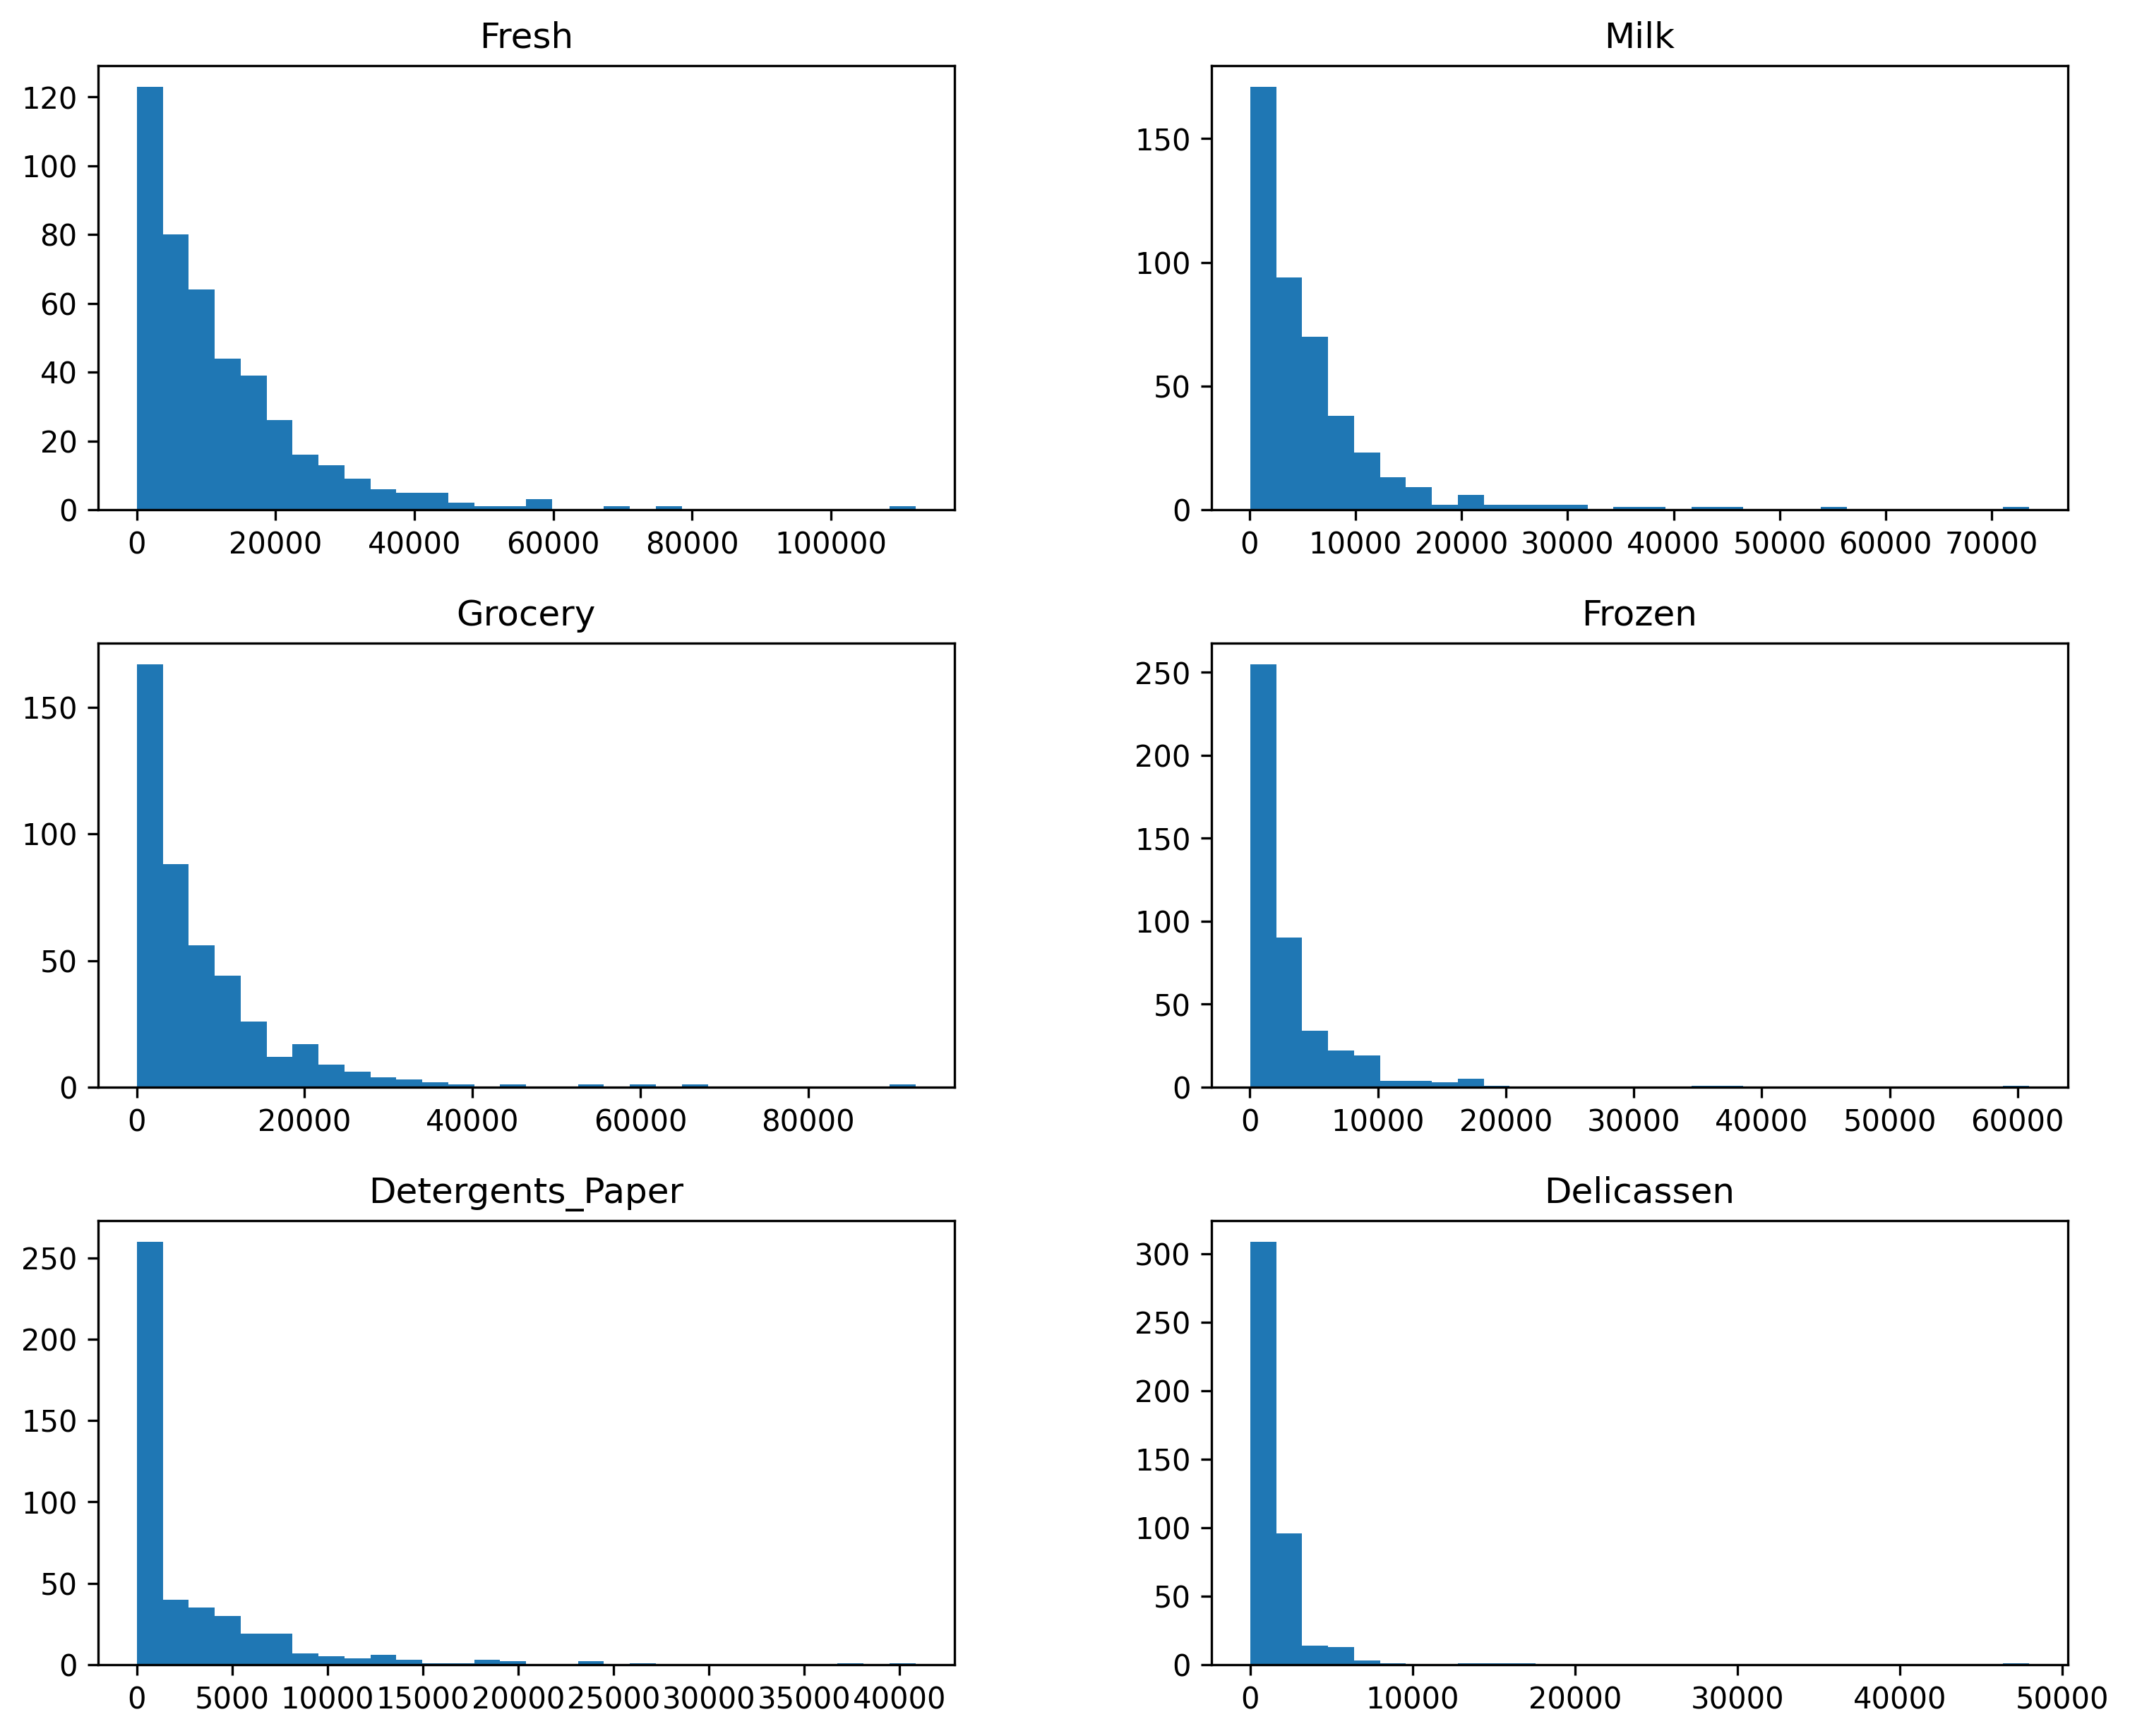

In [4]:
data[numeric].hist(bins=30, figsize=(12,10), grid=False)

plt.show()

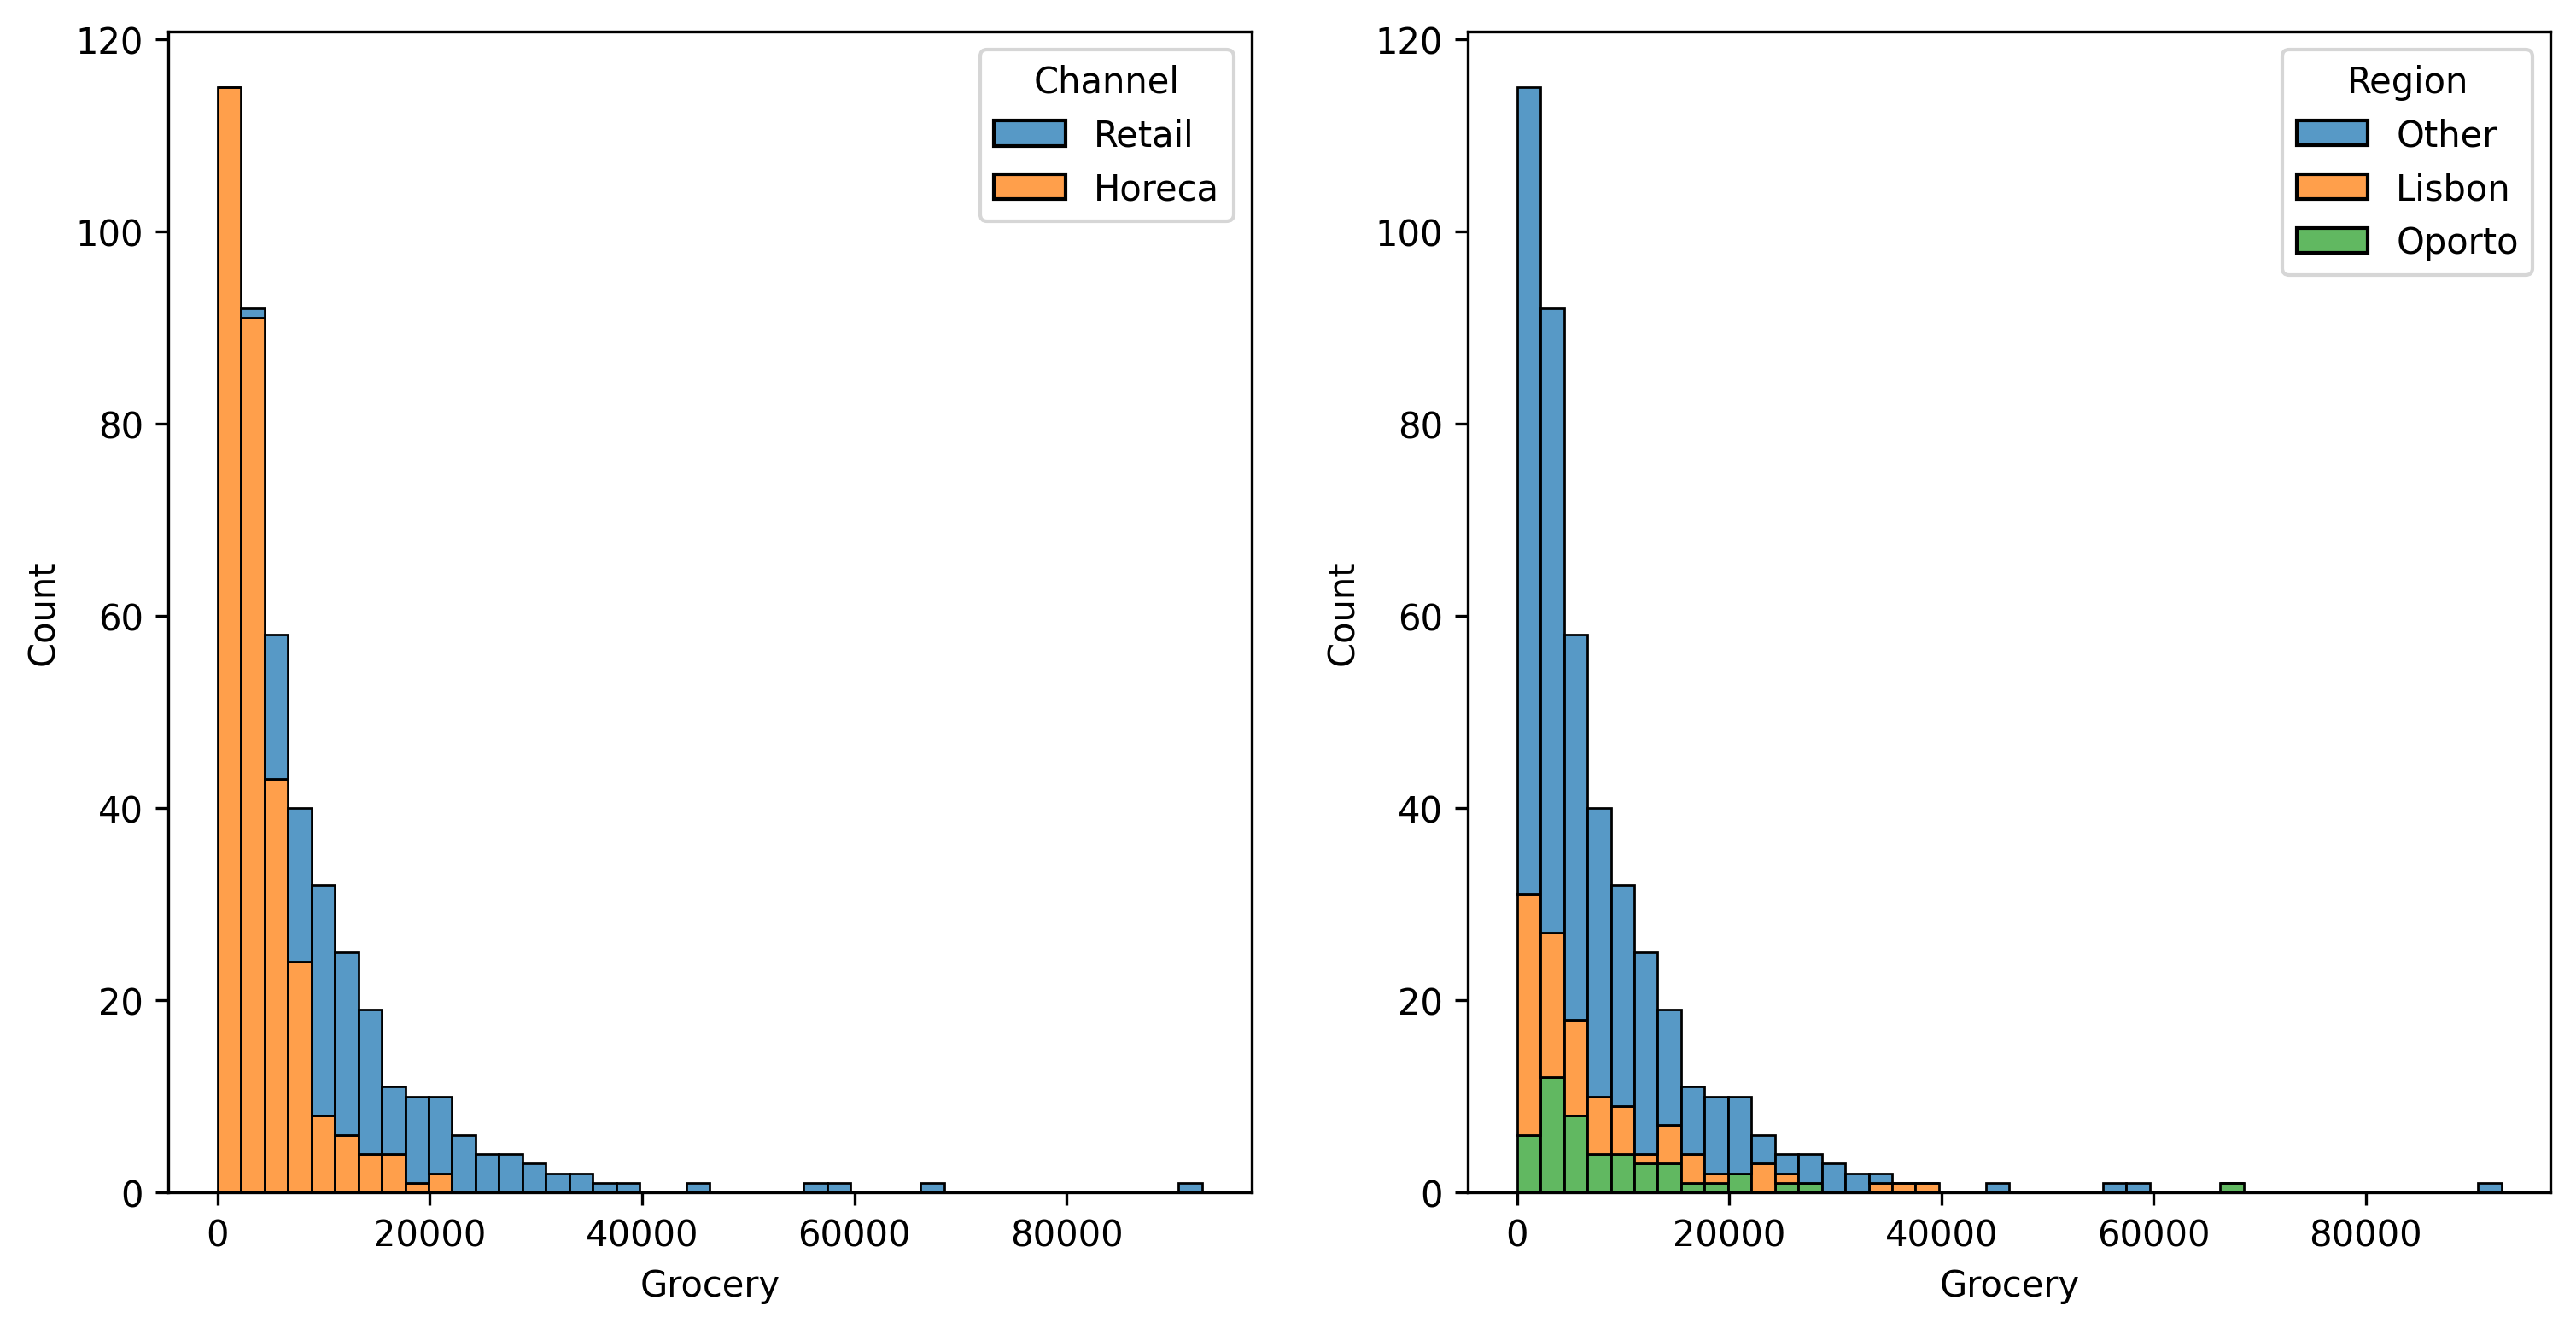

In [5]:
fig, axes = plt.subplots(1, 2, figsize = (12,6))

for ax, col in zip(axes.flatten(), categorical):
    sns.histplot(data=data, x ='Grocery', hue=col,
                 multiple='stack', ax=ax)
    
plt.show()

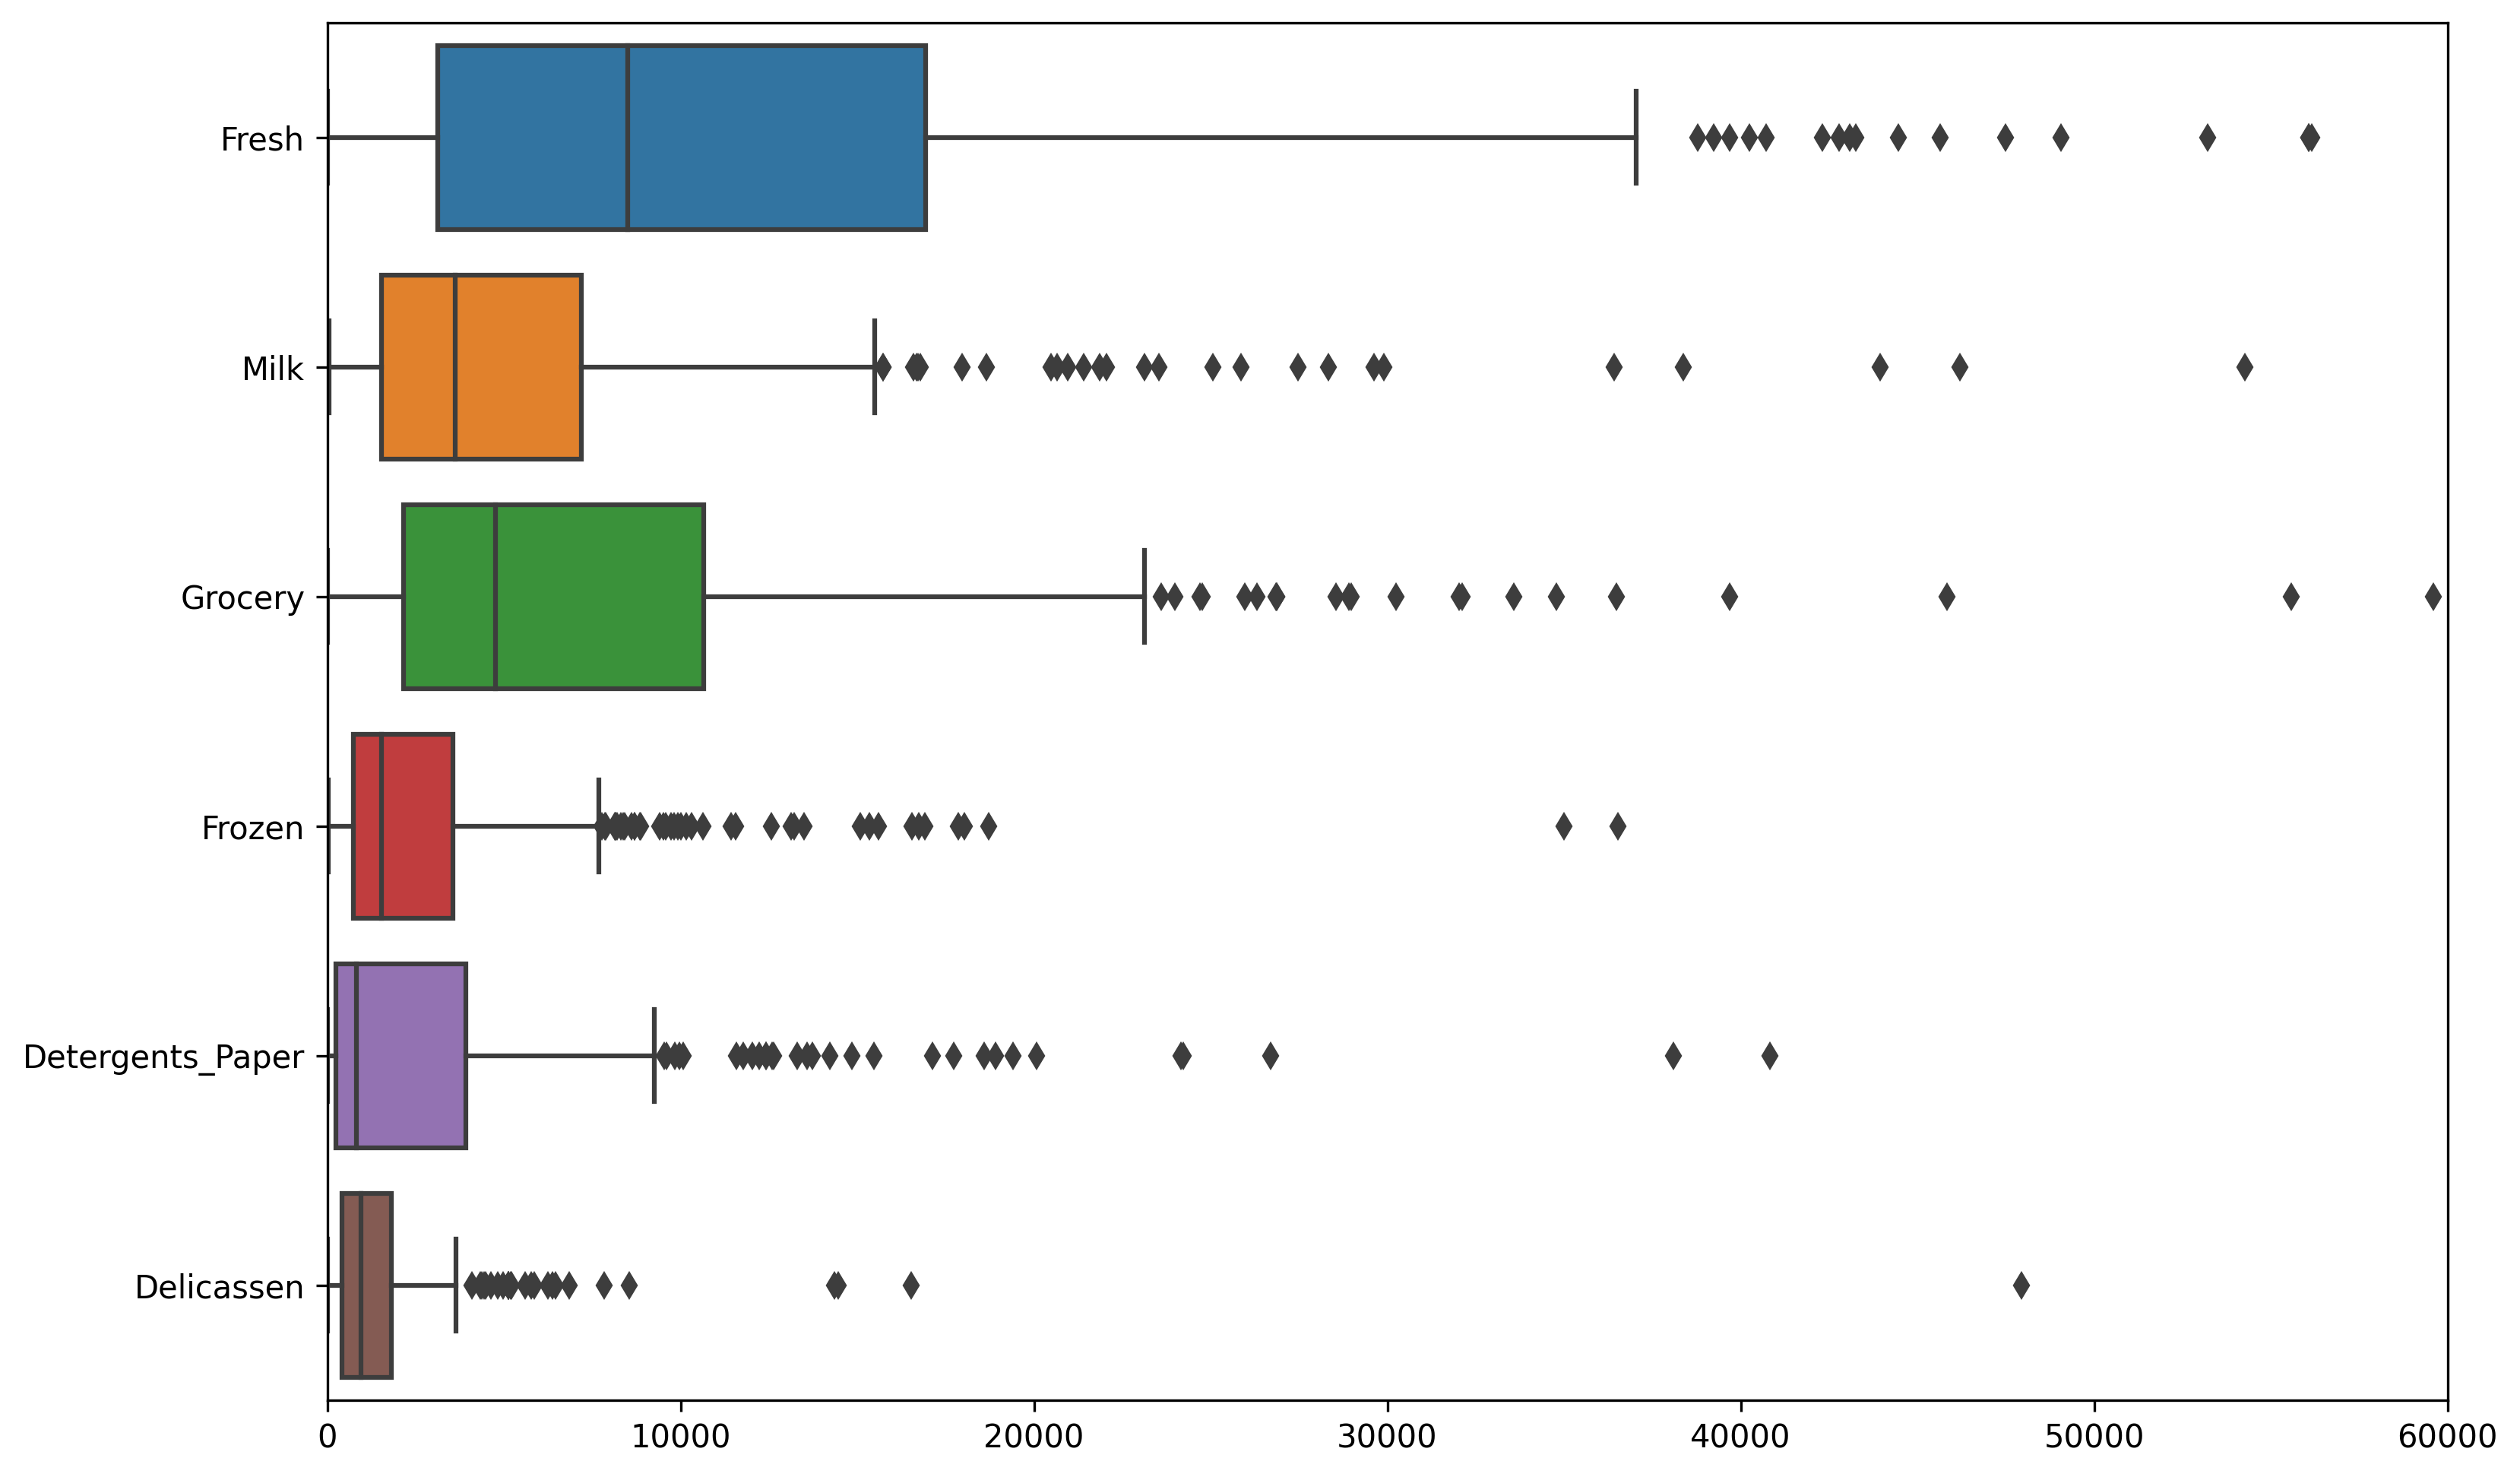

In [6]:
fig, ax = plt.subplots(figsize = (12,8))

sns.boxplot(data=data[numeric], orient='h', ax = ax)
ax.set_xlim(0, 60000)

plt.show()

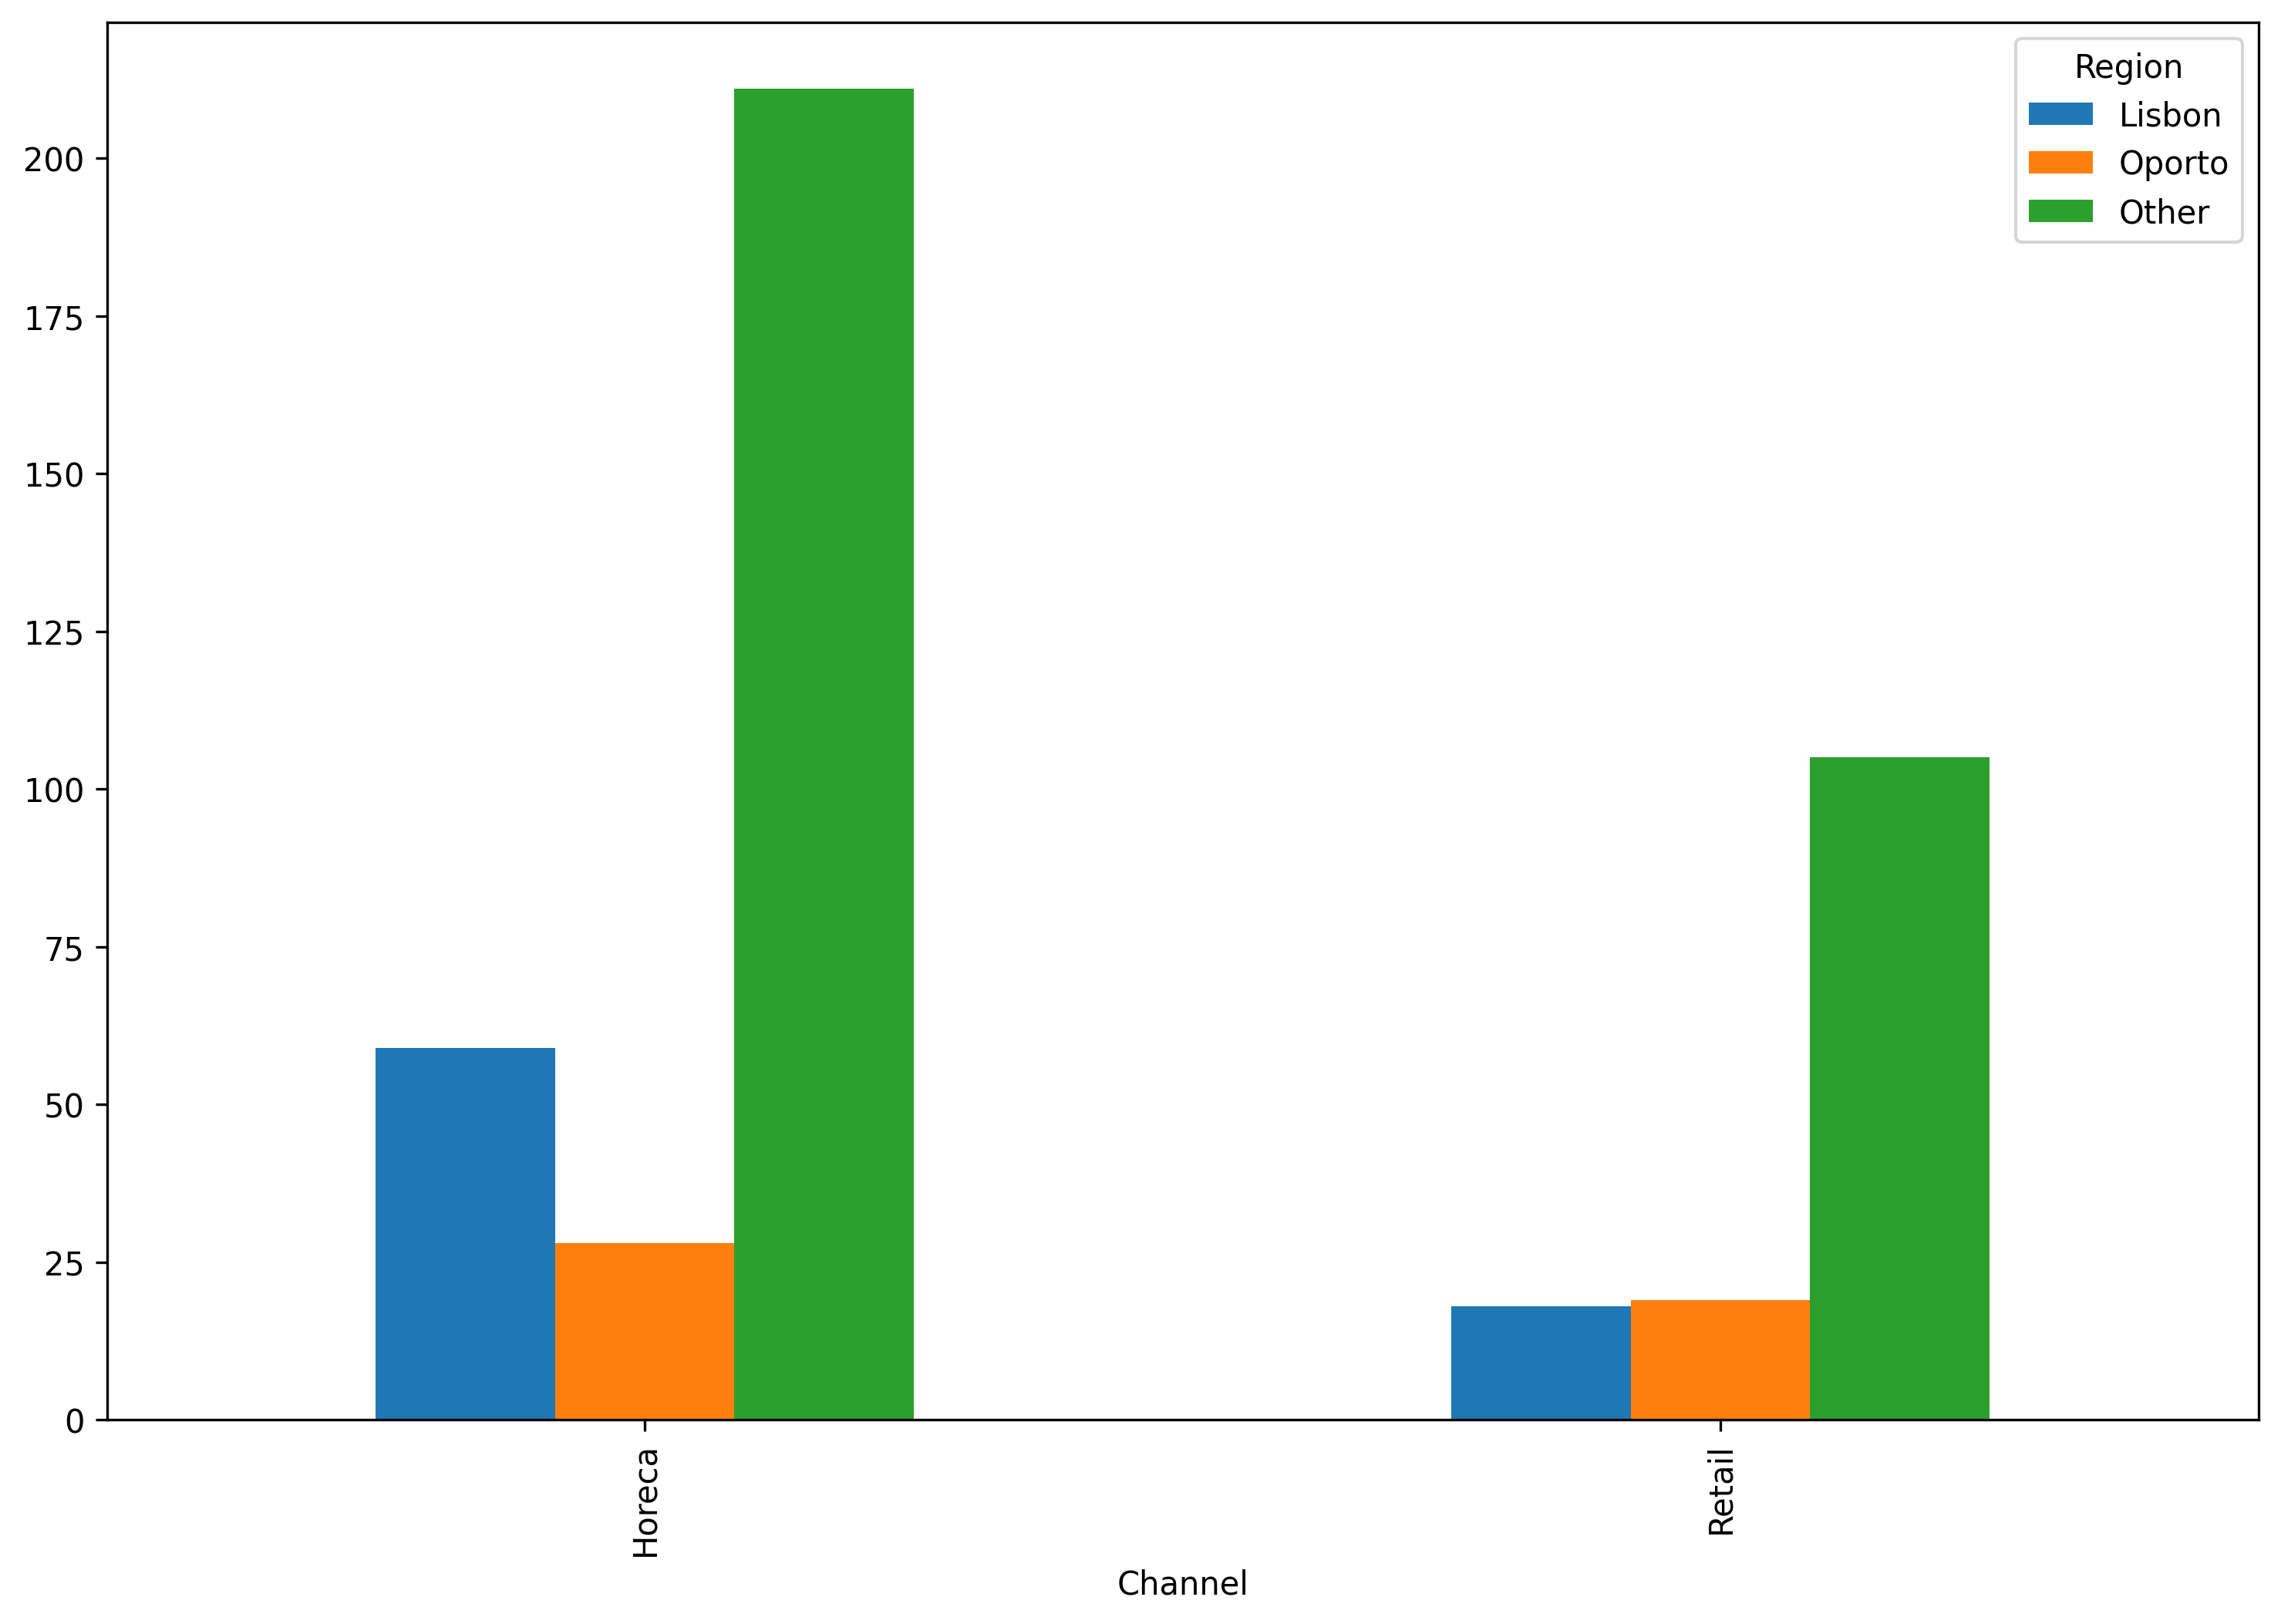

In [7]:
group = data.groupby(['Channel', 'Region']).size().unstack()
group.plot(kind='bar', figsize=(12,8))

plt.show()

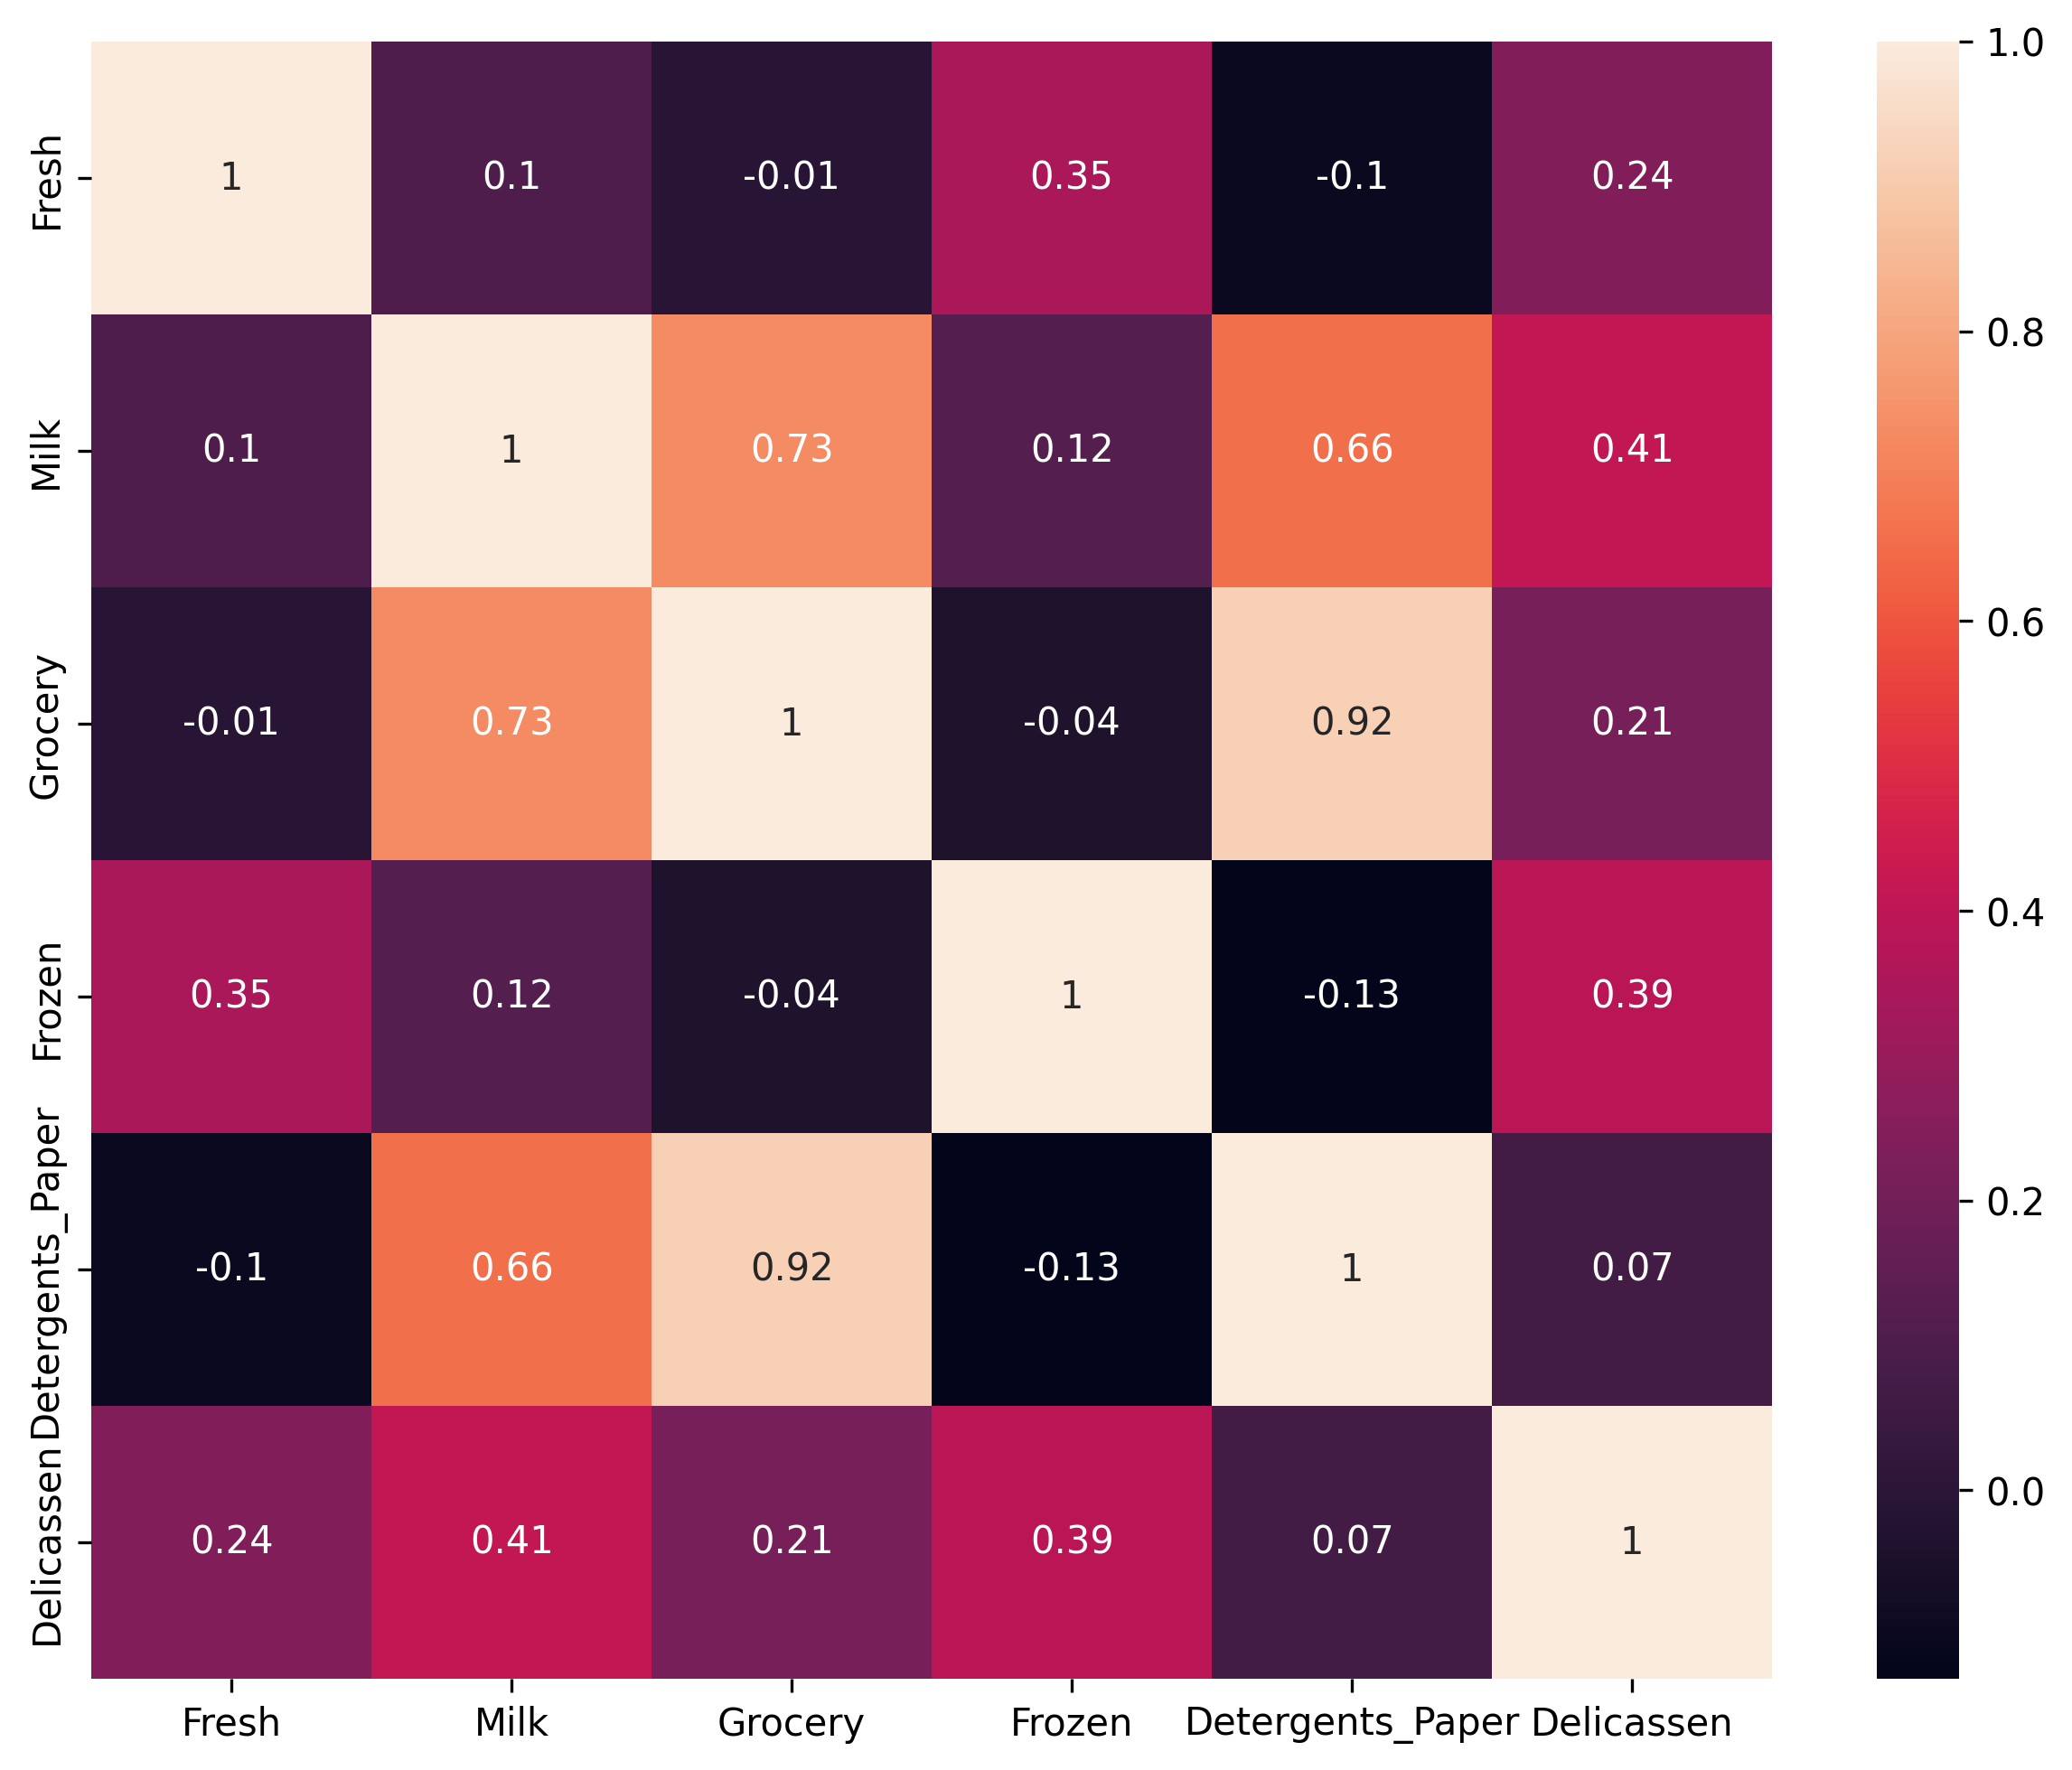

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(decimals=2), annot=True)

plt.show()

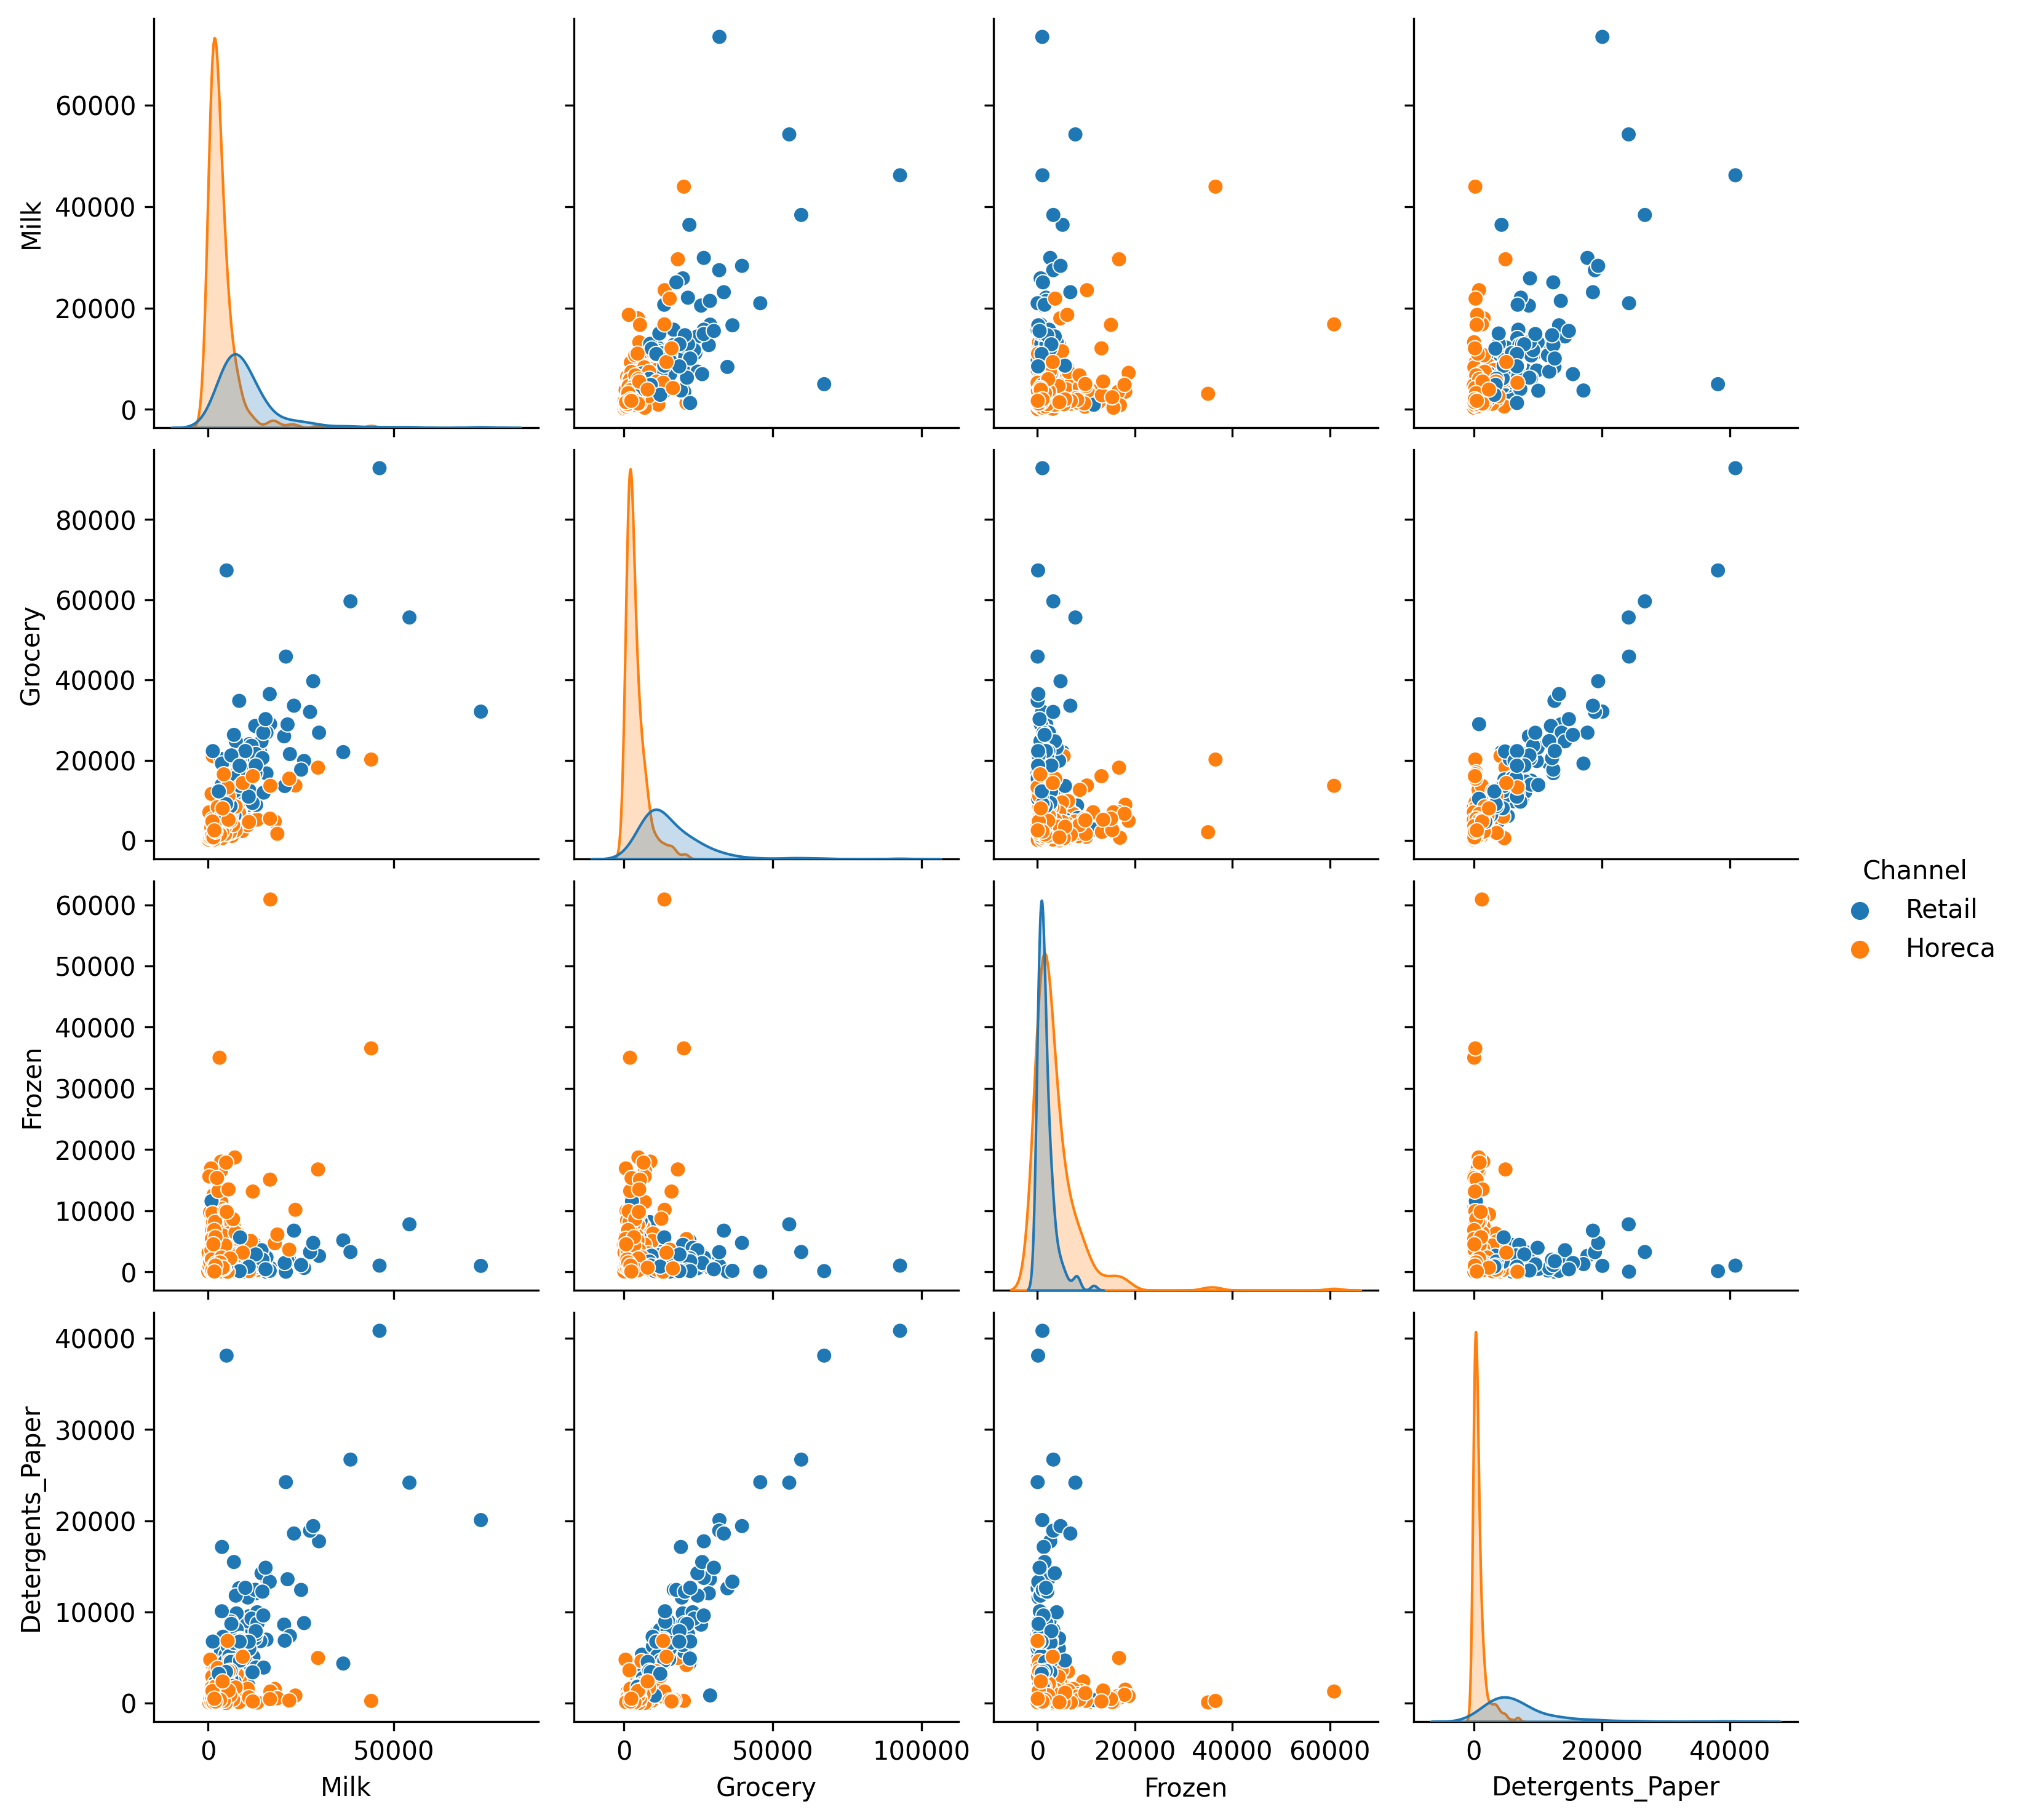

In [18]:
cols = ['Milk', 'Grocery', 'Frozen', 'Detergents_Paper']

sns.pairplot(data, vars=cols, hue='Channel')
plt.show()

### Initializing the PyCaret Environment

In [23]:
anomaly = setup(data, session_id = 8477)

,Description,Value
0,session_id,8477
1,Original Data,"(440, 8)"
2,Missing Values,False
3,Numeric Features,6
4,Categorical Features,2
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(440, 11)"
9,CPU Jobs,-1


### Creating the Model

In [24]:
model = create_model('lof', fraction = 0.05)

### Assigning the Model

In [25]:
data_assigned = assign_model(model)

data_assigned.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Anomaly,Anomaly_Score
0,Retail,Other,12669,9656,7561,214,2674,1338,0,1.107687
1,Retail,Other,7057,9810,9568,1762,3293,1776,0,1.027102
2,Retail,Other,6353,8808,7684,2405,3516,7844,0,1.398439
3,Horeca,Other,13265,1196,4221,6404,507,1788,0,1.200384
4,Retail,Other,22615,5410,7198,3915,1777,5185,0,1.164052


In [29]:
data_inliers = data_assigned.query('Anomaly == 0')
data_outliers = data_assigned.query('Anomaly == 1')

data_outliers.head() 

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Anomaly,Anomaly_Score
23,Retail,Other,26373,36423,22019,5154,4337,16523,1,2.249573
47,Retail,Other,44466,54259,55571,7782,24171,6465,1,3.224197
61,Retail,Other,35942,38369,59598,3254,26701,2017,1,2.799411
65,Retail,Other,85,20959,45828,36,24231,1423,1,2.120687
71,Horeca,Other,18291,1266,21042,5373,4173,14472,1,2.273296


In [37]:
data_assigned.skew()

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
Anomaly              4.143623
Anomaly_Score        5.518765
dtype: float64

In [42]:
data_inliers.skew()

Fresh               1.607831
Milk                1.979165
Grocery             1.632621
Frozen              2.249175
Detergents_Paper    2.088970
Delicassen          3.414133
Anomaly             0.000000
Anomaly_Score       1.574391
dtype: float64

### Plotting the Model

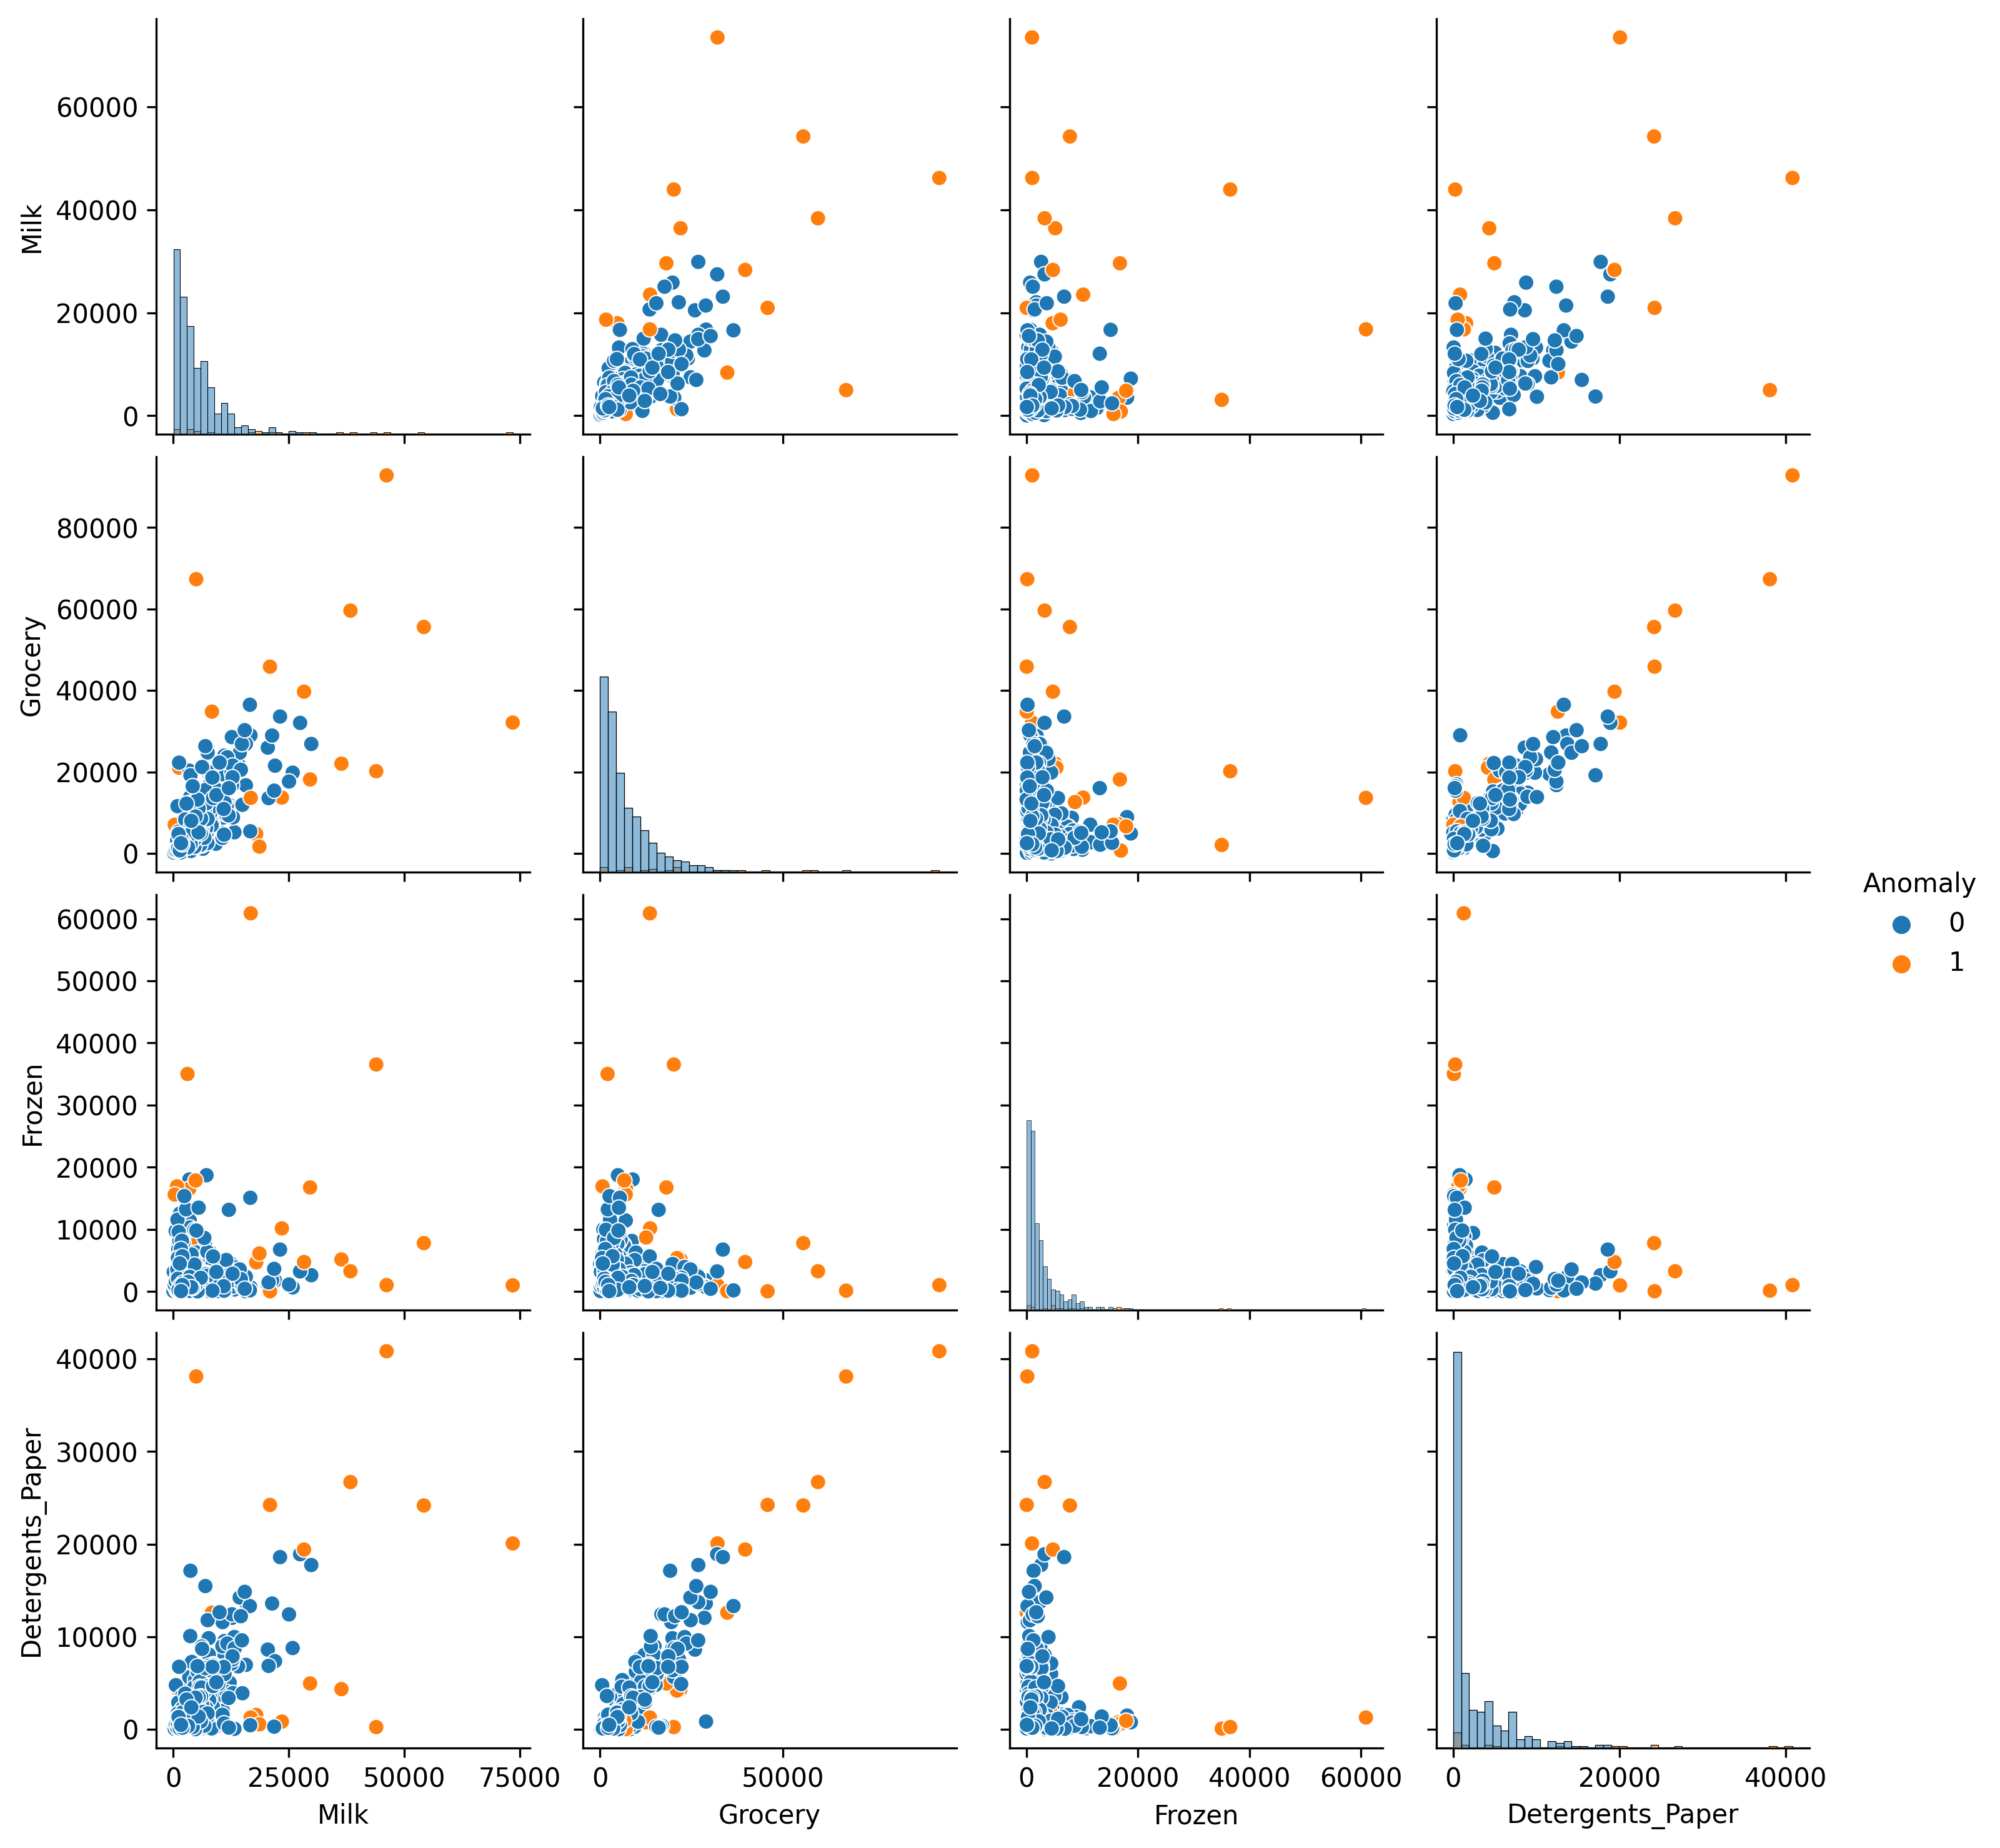

In [44]:
cols = ['Milk', 'Grocery', 'Frozen', 'Detergents_Paper']

sns.pairplot(data_assigned, vars=cols, hue='Anomaly', diag_kind = 'hist')

plt.show()

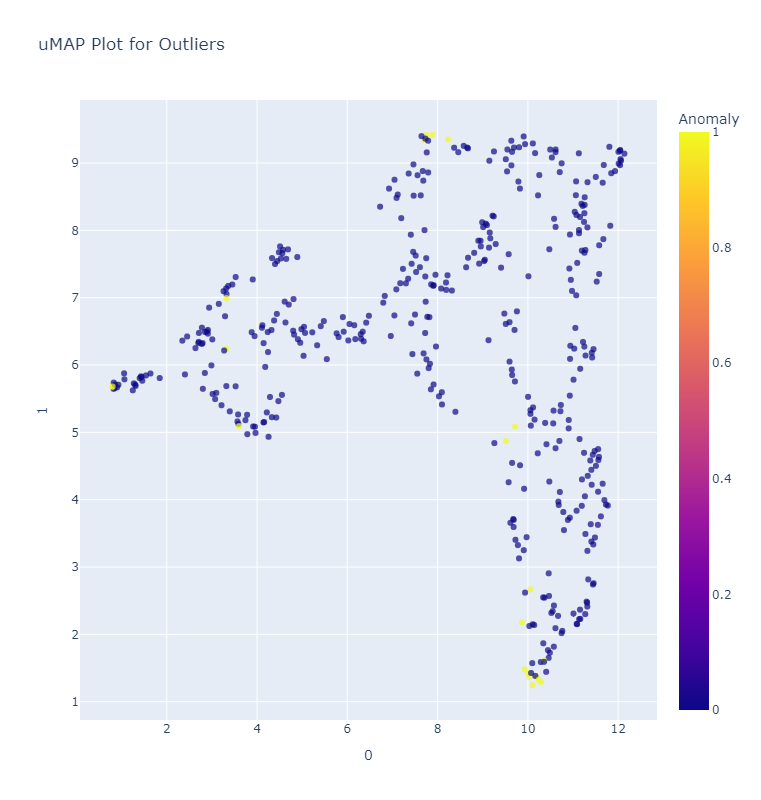

In [305]:
plot_model(model, 'umap')